In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
ri = pd.read_csv("ri_statewide_2020_04_01.csv")
#print(ri.head())

c:\users\grant\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6,17,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Above we import a csv and inspect it. We learn that columns 6, 17, and 30 have mixed data types. 

In [79]:
print(ri.isnull().sum())
print(ri.shape)

raw_row_number                0
date                         10
time                         10
zone                         10
subject_race              29073
subject_sex               29097
department_id                10
type                          0
arrest_made               29073
citation_issued           29073
warning_issued            29073
outcome                   35841
contraband_found         491919
contraband_drugs         493693
contraband_weapons       497886
contraband_alcohol       508464
contraband_other         491919
frisk_performed              10
search_conducted              0
search_basis             491919
reason_for_search        491919
reason_for_stop           29073
vehicle_make             191564
vehicle_model            279593
raw_BasisForStop          29073
raw_OperatorRace          29073
raw_OperatorSex           29073
raw_ResultOfStop          29073
raw_SearchResultOne      491919
raw_SearchResultTwo      508862
raw_SearchResultThree    509513
dtype: i

Above we check the shape of the dataframe. We learn that there are 31 columns and 509681 rows. Next, we check which rows have null values. Some rows have mostly null values, but none are completely null. 

In [80]:
ri.dropna(subset=['subject_sex'], inplace=True)
print(ri.isnull().sum())
print(ri.shape)

raw_row_number                0
date                          0
time                          0
zone                          0
subject_race                  0
subject_sex                   0
department_id                 0
type                          0
arrest_made                   0
citation_issued               0
warning_issued                0
outcome                    6763
contraband_found         462822
contraband_drugs         464596
contraband_weapons       468789
contraband_alcohol       479367
contraband_other         462822
frisk_performed               0
search_conducted              0
search_basis             462822
reason_for_search        462822
reason_for_stop               0
vehicle_make             162525
vehicle_model            250553
raw_BasisForStop              0
raw_OperatorRace              0
raw_OperatorSex               0
raw_ResultOfStop              0
raw_SearchResultOne      462822
raw_SearchResultTwo      479765
raw_SearchResultThree    480416
dtype: i

We are interested to see if a citizen's sex affects how they are treated by the police, but we had a lot of rows with no info on the sex of the citizen. So above we delete all rows without the citizen's sex data. We then check the null sums and shape of the dataframe again to make sure everything has gone according to plan. We can see that we have no null values in the subject_sex column, and also it seems that many other columns shared null values in those rows, because many other columns now also have zero null values. We can also be doubly sure this worked because our shape output tells us we are down a number of rows equal to the number of null values that were in the subject_sex column. 

In [81]:
#print(ri[['citation_issued', 'arrest_made']].value_counts())
ri['citation_issued'] = ri.citation_issued.astype('bool')
ri['arrest_made'] = ri.arrest_made.astype('bool')

Here we checked the first few rows of our new dataframe without a lot of null values to see which data types were common. We found that almost all columns contained objects, but a few could easily be converted into boolean values. Since both 'citation_issued' and 'arrest_made' contained only true and false values, we converted them into booleans for easier operating. 

In [82]:
#print(ri.date.head())
#print(ri.time.head())
combined = ri.date.str.cat(ri.time, sep=' ')
ri['datetime'] = pd.to_datetime(combined)
print(ri.datetime.head())

0   2005-11-22 11:15:00
1   2005-10-01 12:20:00
2   2005-10-01 12:30:00
3   2005-10-01 12:50:00
4   2005-10-01 13:10:00
Name: datetime, dtype: datetime64[ns]


Above, we checked to make sure our date and time columns looked useable, which they did. We then combined them to make a datetime object, but also kept the old columns to have the adaptability of object functions and datetime functions. 

In [83]:
#print(ri.columns)
female = ri[ri.subject_sex == 'female']
male = ri[ri.subject_sex == 'male']
#print(female.shape)
#print(male.shape)
print('female citations overall below')
print(female.citation_issued.value_counts(normalize=True))
print('male citations overall below')
print(male.citation_issued.value_counts(normalize=True))

female citations overall below
True     0.897337
False    0.102663
Name: citation_issued, dtype: float64
male citations overall below
True     0.88913
False    0.11087
Name: citation_issued, dtype: float64


Above, we established subsetted dataframes containing only either females or males who were stopped by the police. We then calculated the percentages at which each sex receives citations. At least in Rhode Island, the citation rates look pretty consistant, with less than a 1% difference in citation rates between males and females overall. 

In [84]:
for race in female['subject_race'].unique():
    print(race + ' females\' citation rate below')
    print(female[female.subject_race == race].citation_issued.value_counts(normalize=True))
    
for race in male['subject_race'].unique():
    print(race + ' males\' citation rate below')
    print(male[male.subject_race == race].citation_issued.value_counts(normalize=True))

white females' citation rate below
True     0.904959
False    0.095041
Name: citation_issued, dtype: float64
black females' citation rate below
True     0.860772
False    0.139228
Name: citation_issued, dtype: float64
asian/pacific islander females' citation rate below
True     0.92903
False    0.07097
Name: citation_issued, dtype: float64
hispanic females' citation rate below
True     0.864146
False    0.135854
Name: citation_issued, dtype: float64
other females' citation rate below
True     0.905882
False    0.094118
Name: citation_issued, dtype: float64
white males' citation rate below
True     0.901432
False    0.098568
Name: citation_issued, dtype: float64
hispanic males' citation rate below
True     0.849354
False    0.150646
Name: citation_issued, dtype: float64
black males' citation rate below
True     0.85787
False    0.14213
Name: citation_issued, dtype: float64
other males' citation rate below
True     0.921028
False    0.078972
Name: citation_issued, dtype: float64
asian/pa

Above, we wanted to get more data to gain insight on whether or not race can have an effect on the likeliness someone will receive a citation. We created two for-loops, one for females and one for males, that iterate through every unique race and outputs values similar to what we did with females and males before. But now we can see the citation rate for white females, white males, black females, black males, and so on. 

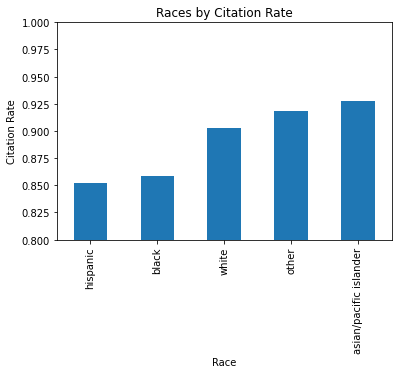

In [85]:
#female_cite = [0.904, 0.860, 0.929, 0.864, 0.905]
#labels = ['white', 'black', 'asian/pacific islander', 'hispanic', 'other']
#male_cite = [0.901, 0.857, 0.927, 0.849, 0.921]

race_cite = ri.groupby('subject_race').citation_issued.mean()
race_cite = race_cite.sort_values()
race_cite.plot(kind='bar')
plt.ylim(0.8, 1.0)
plt.title('Races by Citation Rate')
plt.xlabel('Race')
plt.ylabel('Citation Rate')
plt.show()

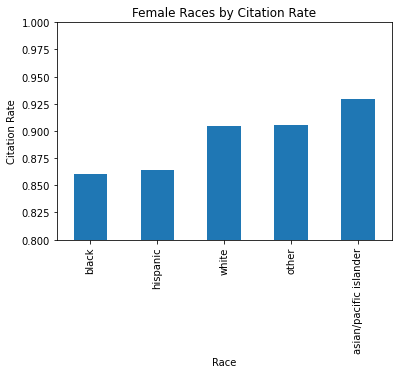

In [86]:
frace_cite = female.groupby('subject_race').citation_issued.mean()
frace_cite = frace_cite.sort_values()
frace_cite.plot(kind='bar')
plt.ylim(0.8, 1.0)
plt.title('Female Races by Citation Rate')
plt.xlabel('Race')
plt.ylabel('Citation Rate')
plt.show()

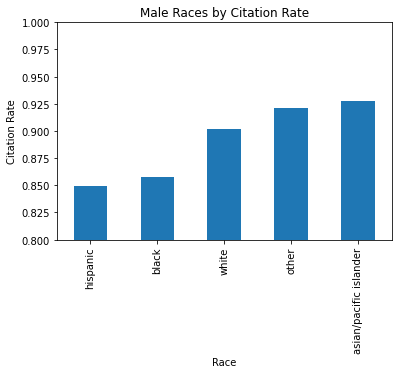

In [87]:
mrace_cite = male.groupby('subject_race').citation_issued.mean()
mrace_cite = mrace_cite.sort_values()
mrace_cite.plot(kind='bar')
plt.ylim(0.8, 1.0)
plt.title('Male Races by Citation Rate')
plt.xlabel('Race')
plt.ylabel('Citation Rate')
plt.show()

First we made a graph showing the citation rate for each recorded race. Then we made two more graphs doing the same thing but only for females and males respectively. We can see that being male or female does not affect the rate of citation much, though there is a little variation in the "other" race. 